# Car price prediction by Suraj Yadavv

# About the dataset

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

# Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("C:/Users/Admin/Downloads/Car Prediction.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.shape

(205, 26)

In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
num_col=df.select_dtypes(exclude=object).columns
num_col

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
cat_col=df.select_dtypes(include=object).columns
cat_col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [16]:
df["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [17]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
df["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [19]:
df["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [20]:
df["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [21]:
df["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [22]:
df["drivewheel"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [23]:
df["enginetype"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [24]:
df["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [25]:
df["fuelsystem"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [26]:
## drop unrelevant column
df.drop(["CarName","carbody"],axis=1,inplace=True)

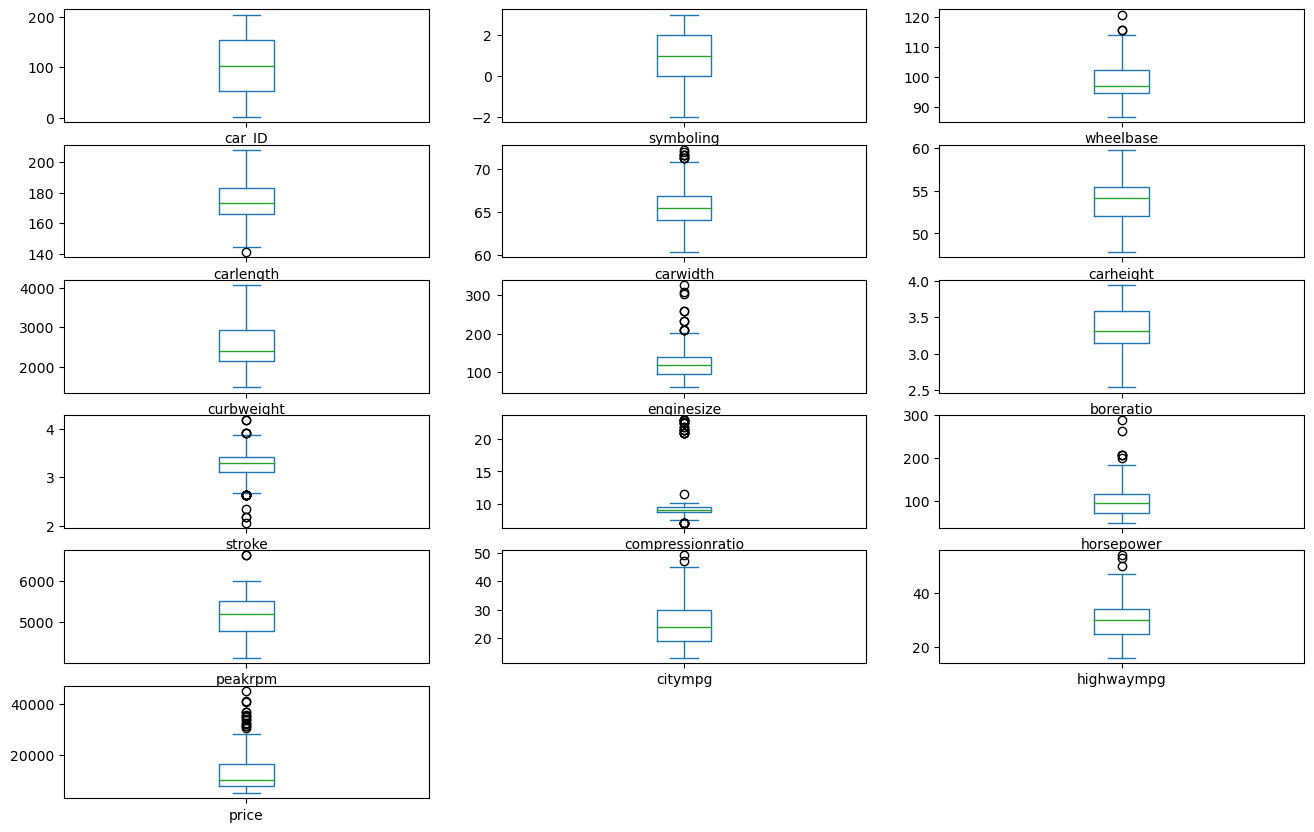

In [27]:
df.plot(kind="box",subplots=True, layout=(7,3),figsize=(16,12)[:5])
plt.show()

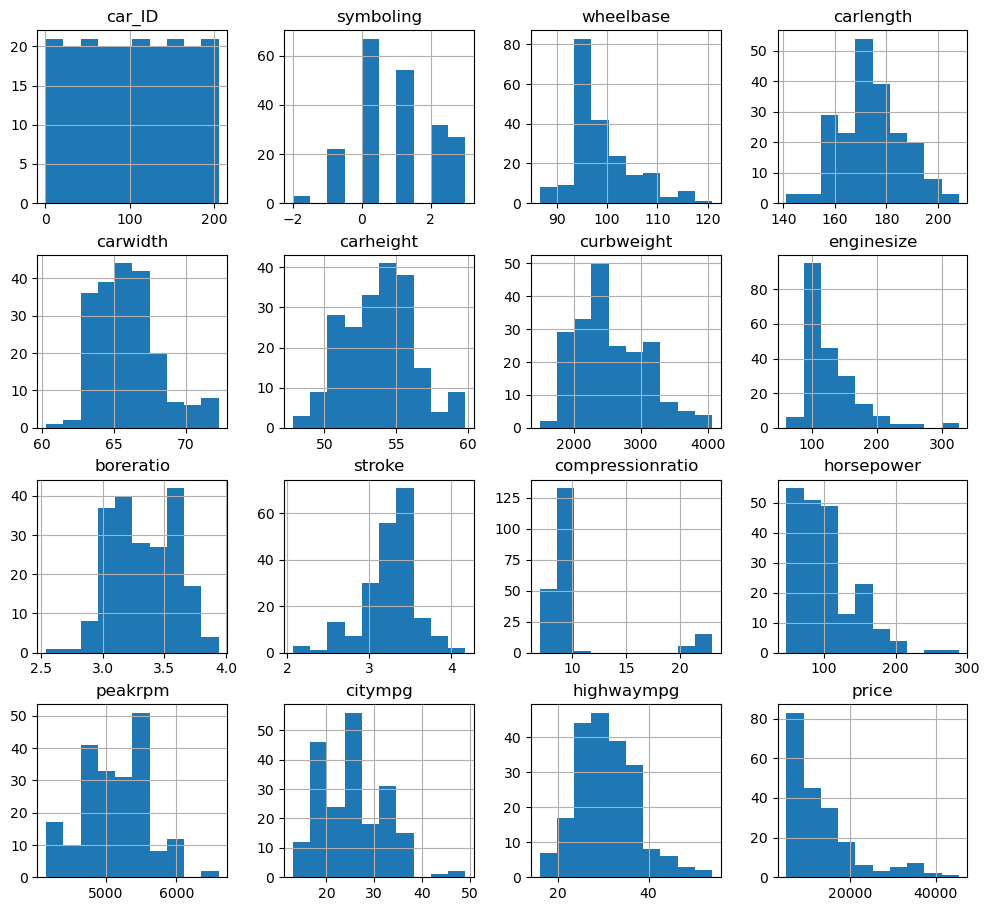

In [28]:
df.hist(figsize=(12,11)[:5])
plt.show()

In [29]:
def scatter_plots(df_name, x_ax_name, y_ax_name):
    scatter_name = f"{y_ax_name}-{x_ax_name}"
    fig_output_name = scatter_name
    plt.title(f"{x_ax_name} - {y_ax_name}\n")
    scatter_name = plt.scatter(df_name[x_ax_name], df_name[y_ax_name])
    scatter_name.axes.tick_params(gridOn=True, size=12, labelsize=10)
    plt.xlabel(f"\n{x_ax_name}", fontsize=20)
    plt.ylabel(f"{y_ax_name}\n", fontsize=20)
    plt.xticks(rotation=90)

In [30]:
def scatter_subplots(df):
    i=0
    j = len(df.columns)-1
    while i < len(df.columns)-1:
        plt.figure(figsize=(20,8), dpi=80)
        for k in range(3): 
            plt.subplot(1, 3, k+1)
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)            
            i += 1
        plt.suptitle("Plotting Each Feature Against The Target", size = 30, fontweight = "bold")
        plt.tight_layout()
        plt.show()
        if j-i == 2:
            plt.subplot(1, 2, 1)
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)   
            i += 1
            plt.subplot(1, 2, 2)
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)
            i += 1
            plt.suptitle("Plotting Each Feature Against The Target", size = 30, fontweight = "bold")
            plt.tight_layout()
            plt.subplots_adjust(wspace=2.5)
            plt.show()
        elif j-i == 1:
            scatter_plots(df, df.columns[i], df.columns[j])
            plt.title(f"{df.columns[i]} - {df.columns[j]}", fontsize=20)
            i += 1
            plt.suptitle("Plotting Each Feature Against The Target", size = 30, fontweight = "bold")
            plt.tight_layout()
            plt.subplots_adjust(wspace=2.5)
            plt.show()
        elif i == j:
            break


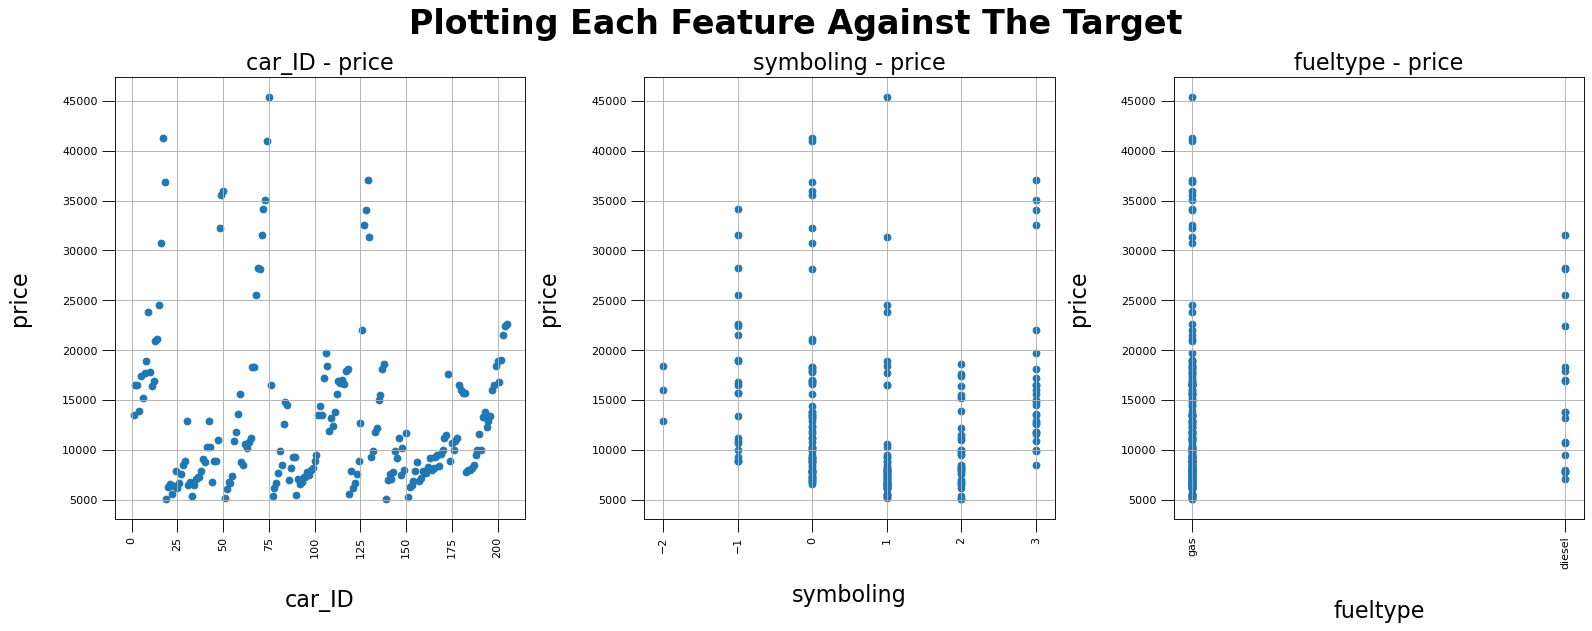

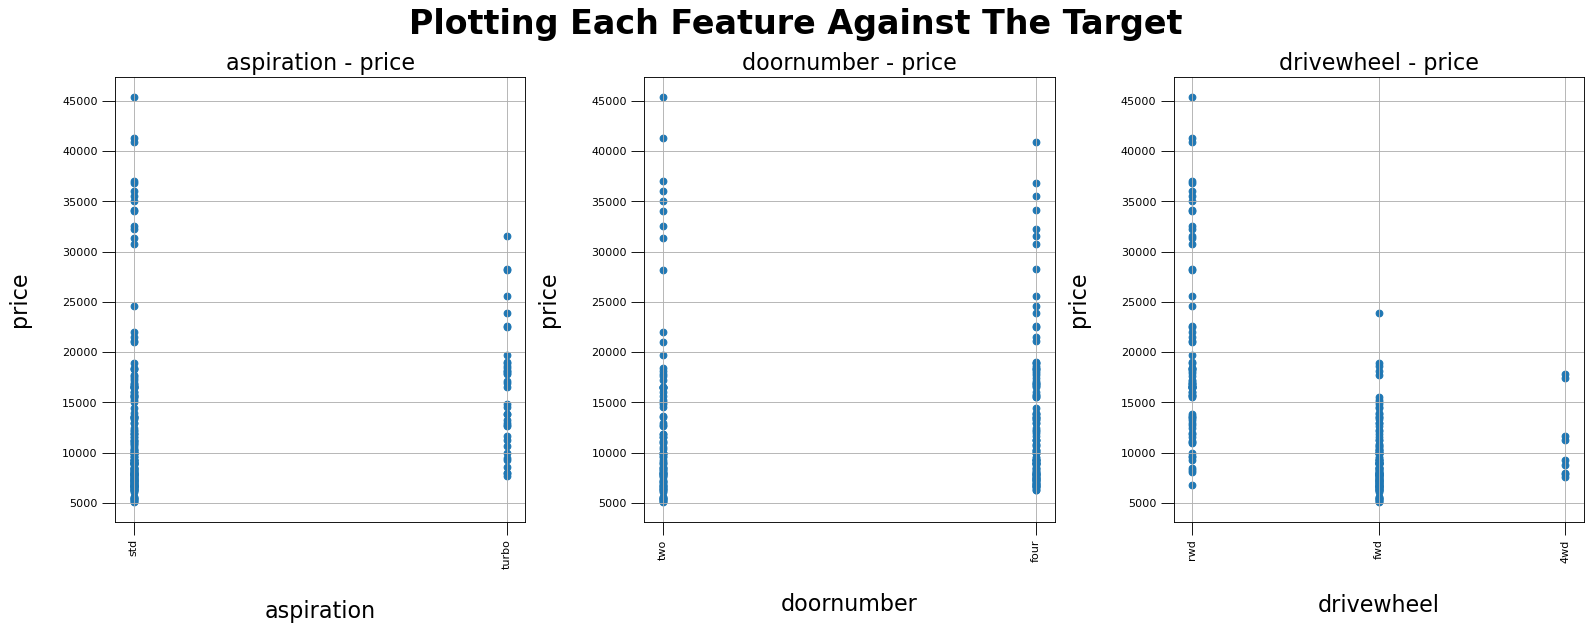

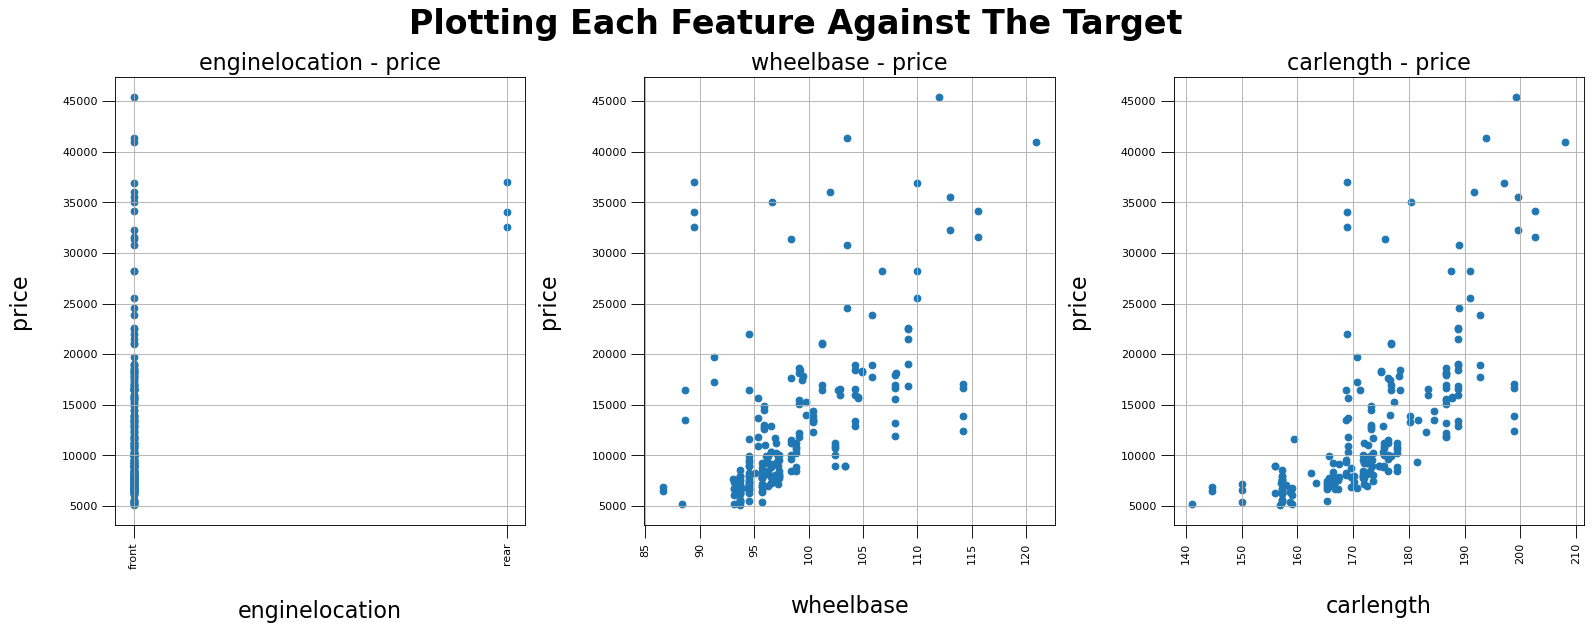

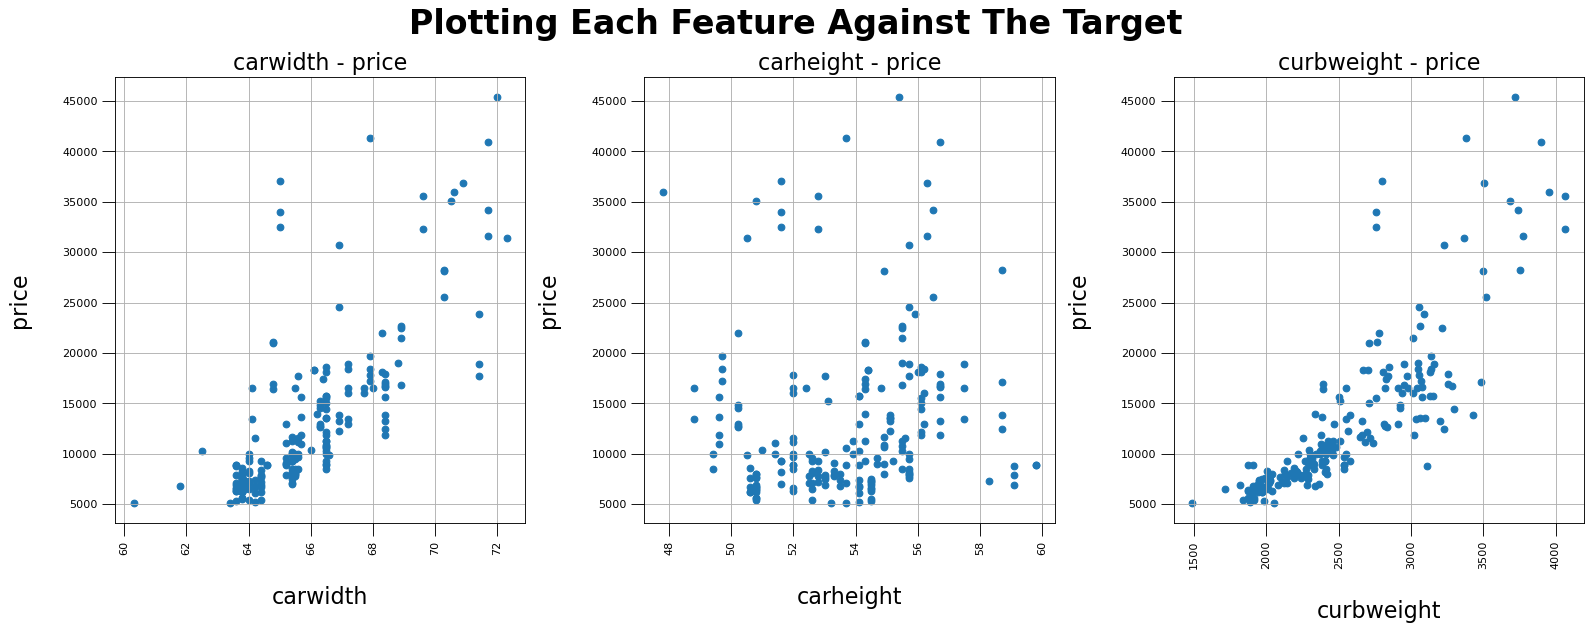

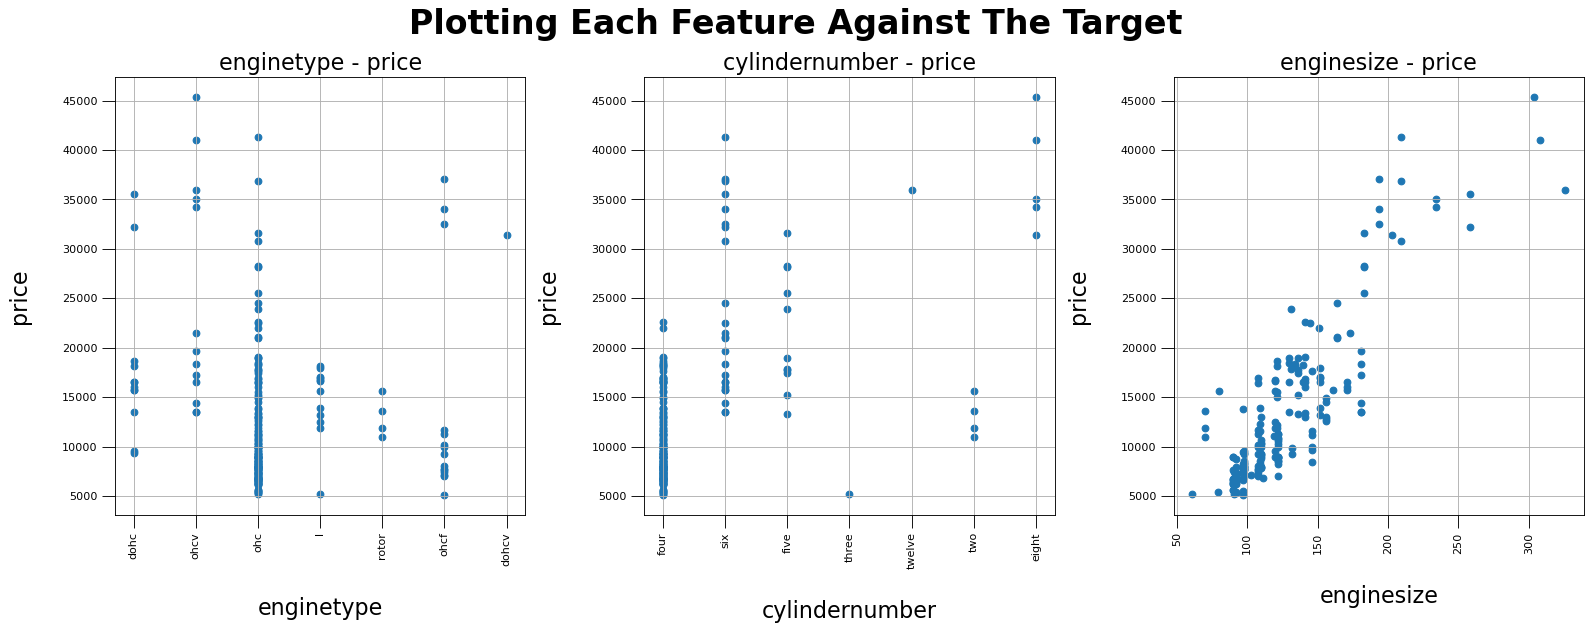

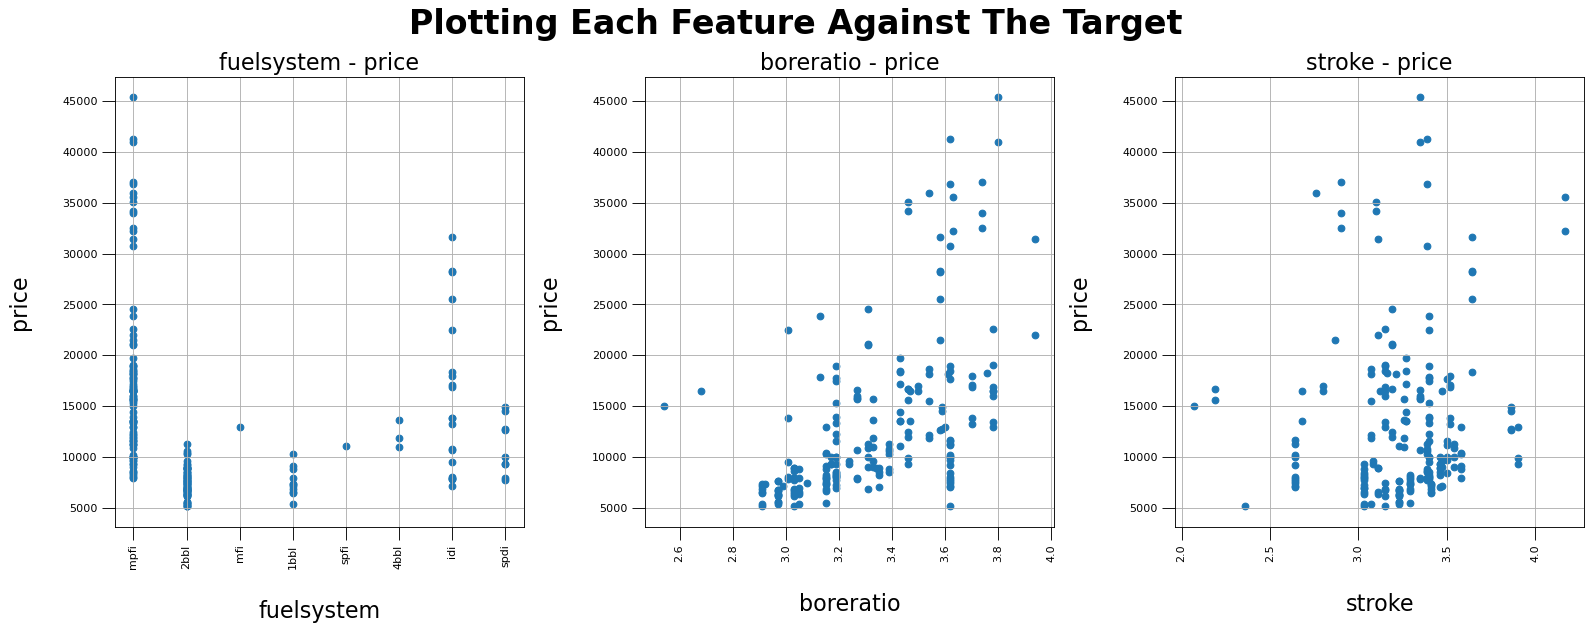

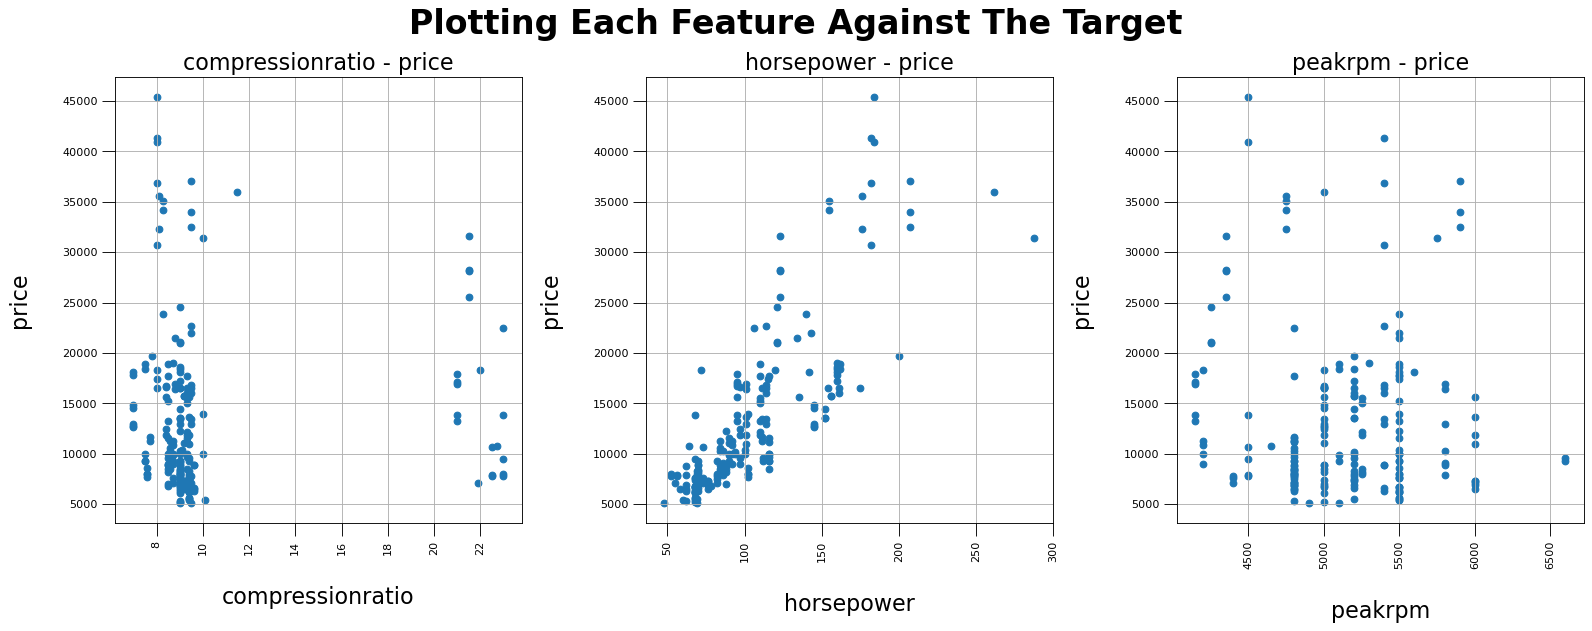

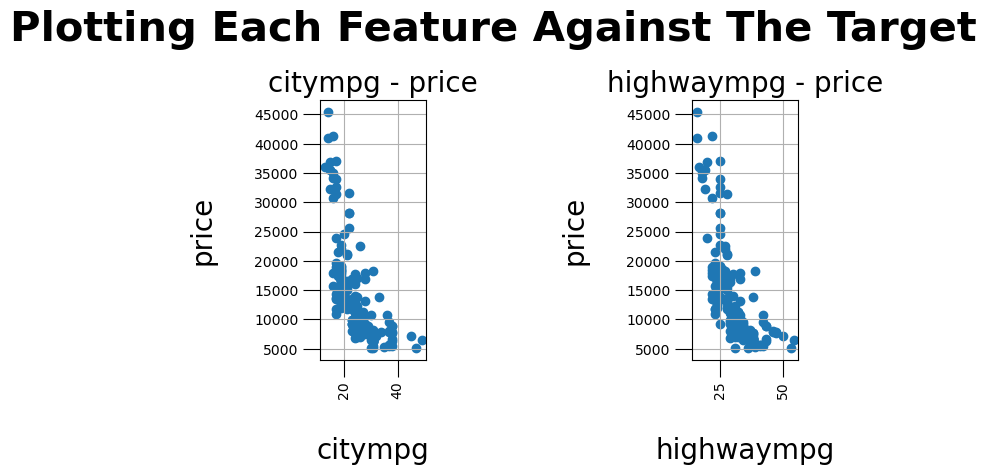

In [31]:
scatter_subplots(df)

In [32]:
corr=df.corr()

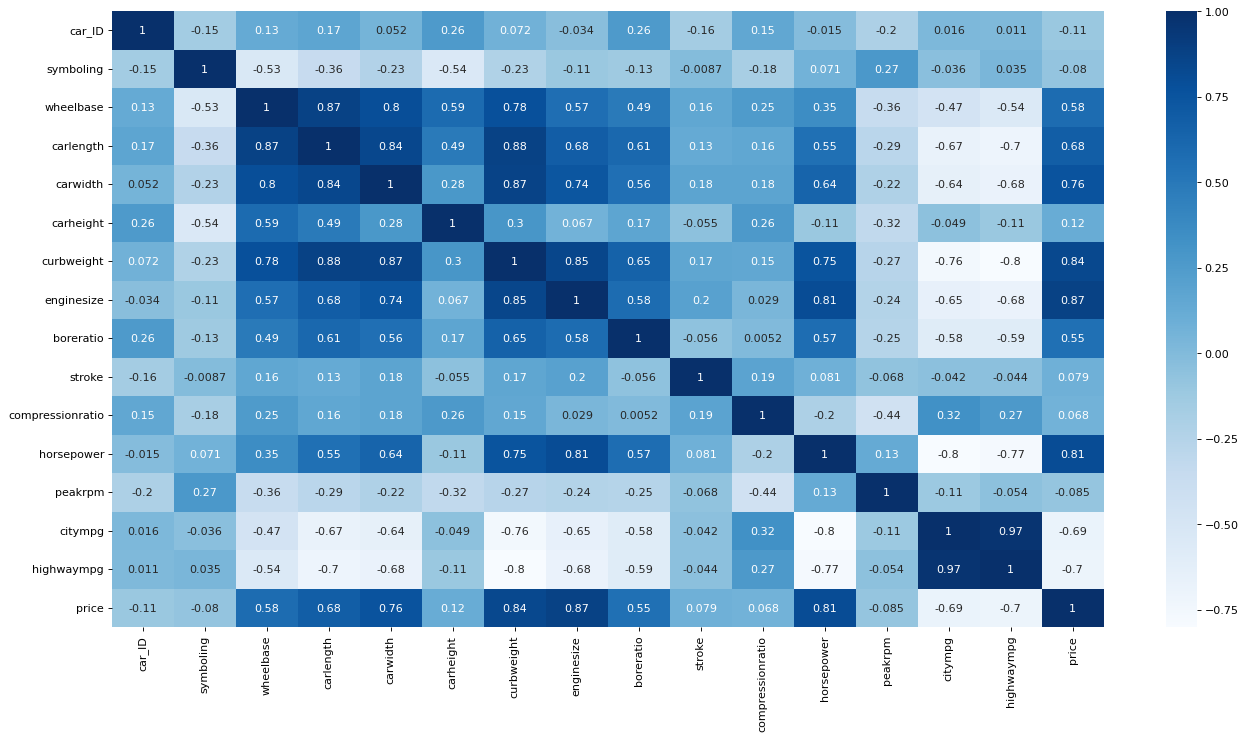

In [33]:
plt.figure(figsize=(20,10), dpi=80)
sns.heatmap(corr,annot=True,cmap=plt.cm.Blues)
plt.show()

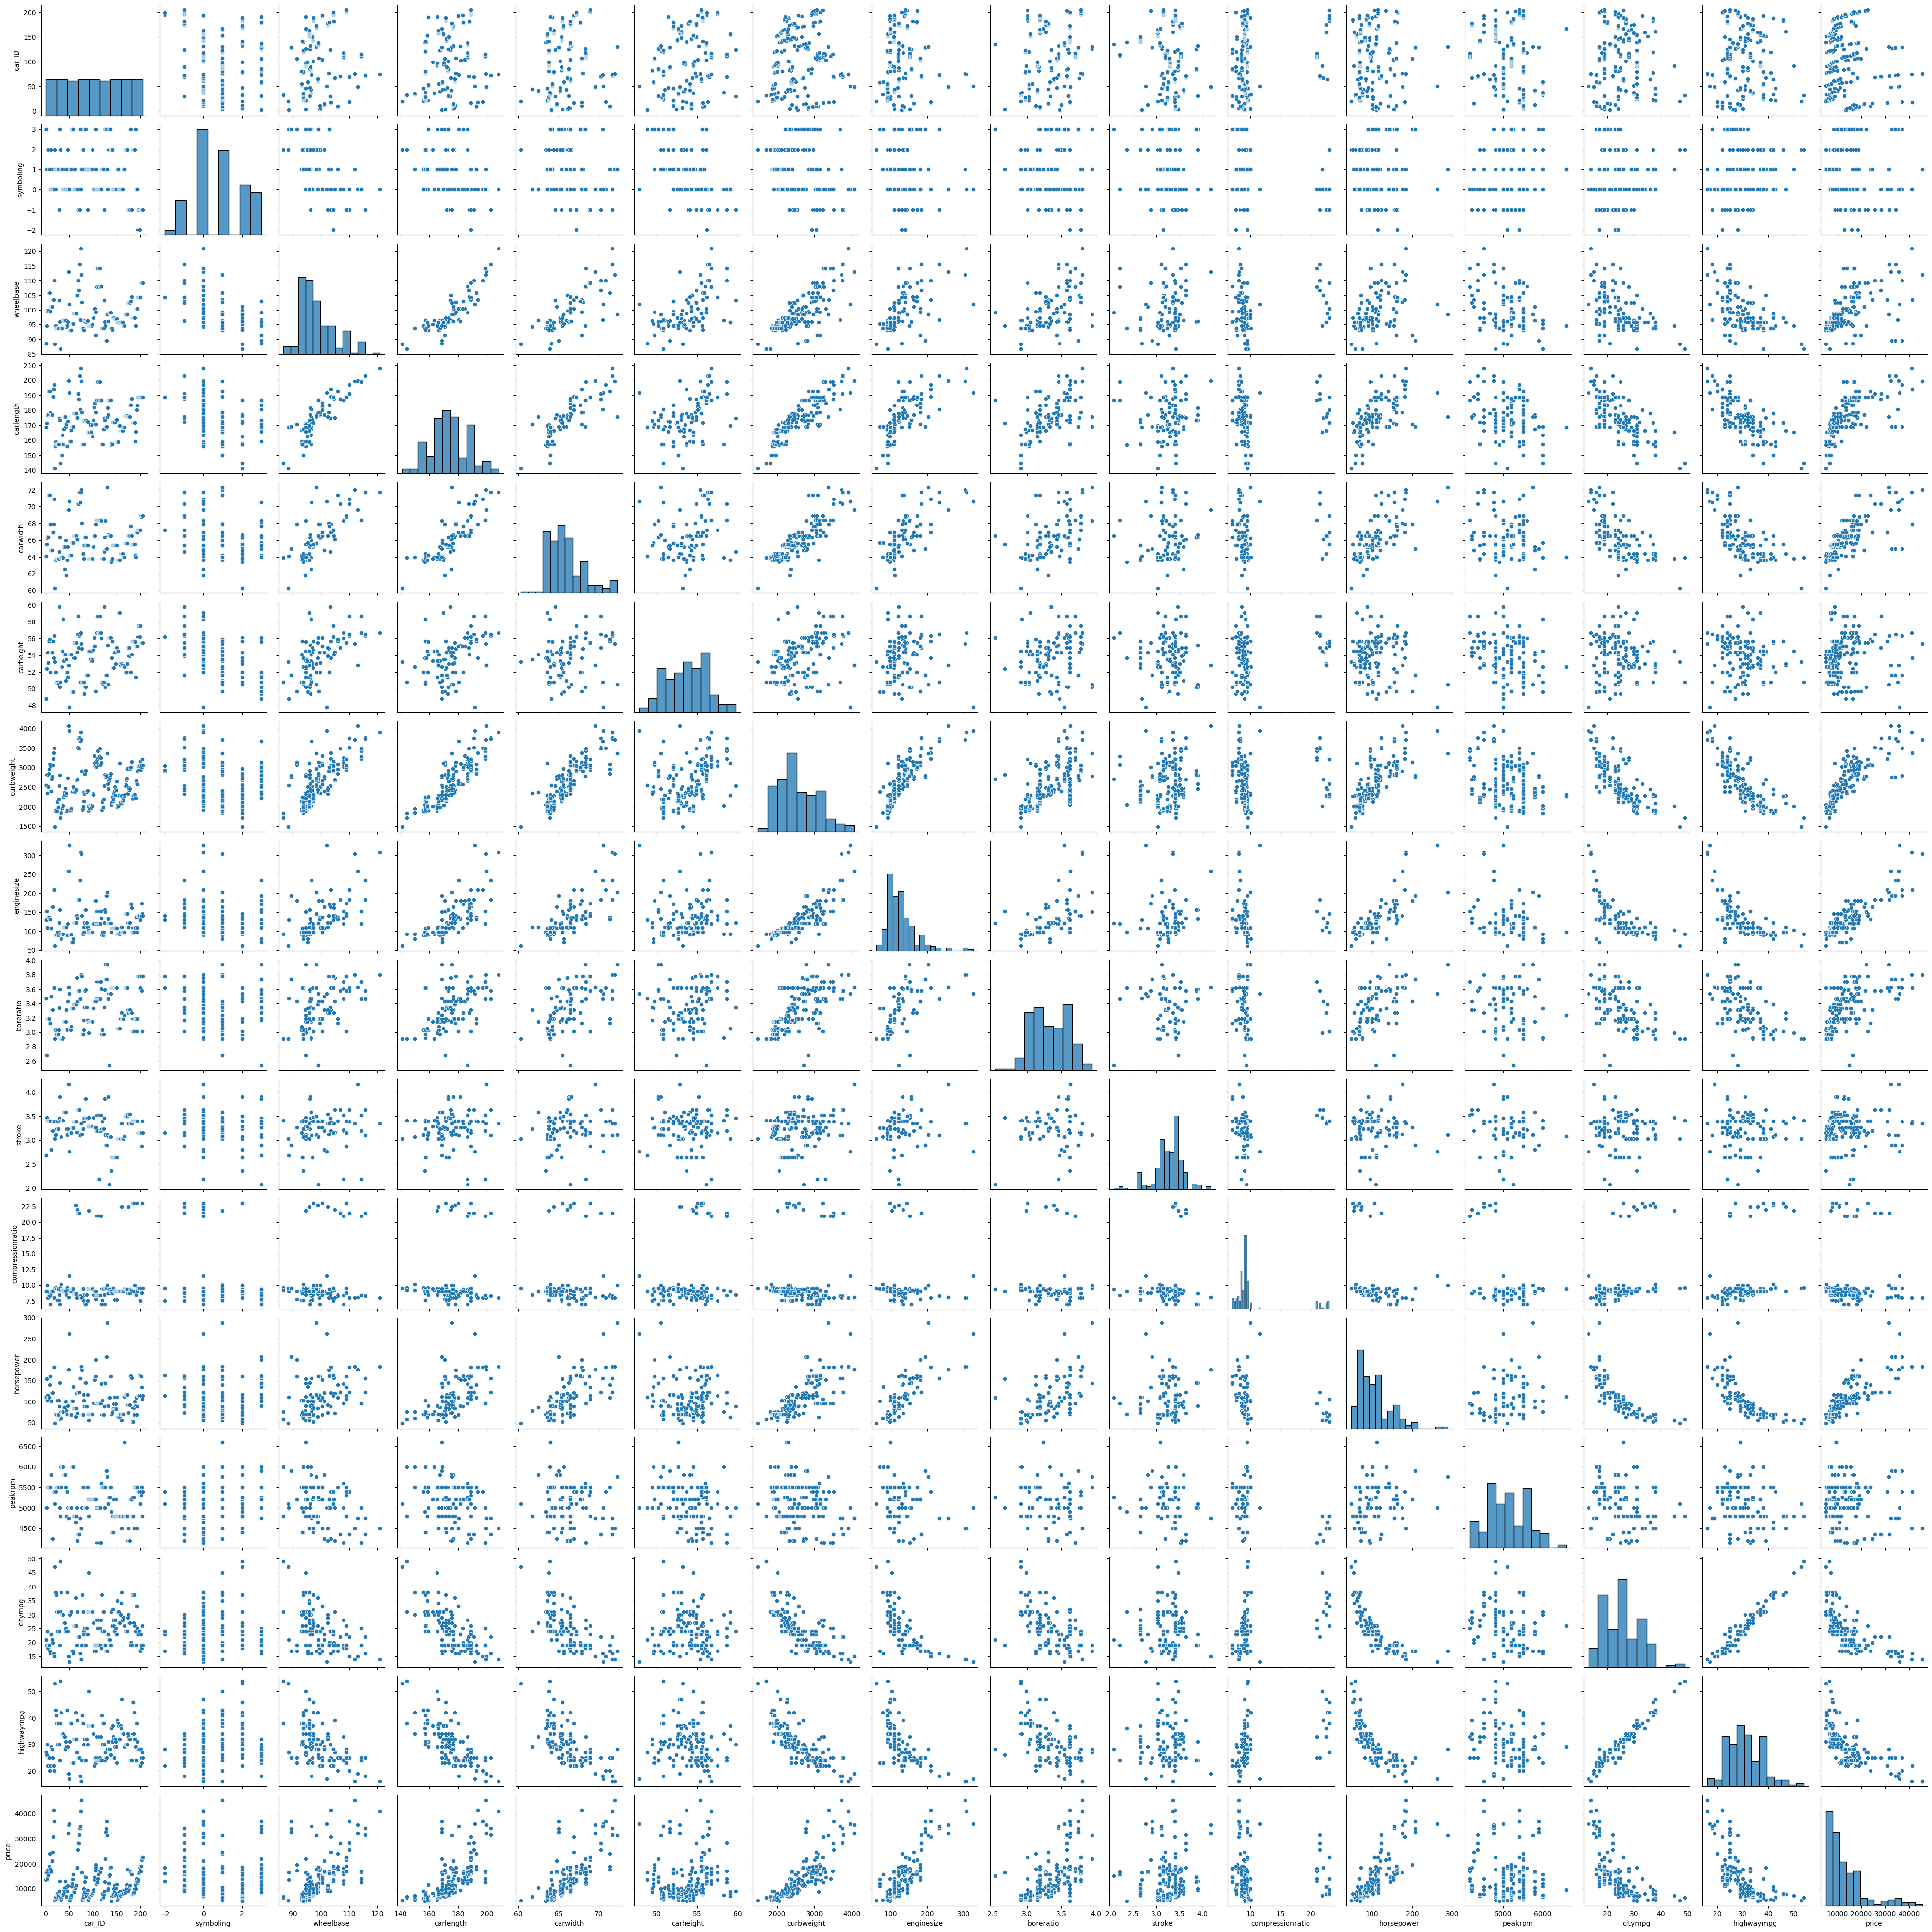

In [34]:
sns.pairplot(df)

In [35]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Machine learning technique

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

columns=["drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","fueltype","aspiration","doornumber"]
for column in columns:
    df[column]=le.fit_transform(df[column])
    
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,1,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,0,1,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,1,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,0,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,0,0,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
x=df.drop("price", axis=1)
y=df["price"]
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(205, 23) (205,)


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
print(205*0.25)
print(205-51.25)

51.25
153.75


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 23)
(41, 23)
(164,)
(41,)


## Linear Regression

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [43]:
def reg_eval_metrics(y_test,ypred):
    mae=mean_absolute_error(y_test,ypred)
    mse=mean_squared_error(y_test,ypred)
    rmse=np.sqrt(mean_squared_error(y_test,ypred))
    r2=r2_score(y_test,ypred)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse:",rmse)
    print("r2_score:",r2)
    
def train_test_score(model):
    print("Training Score:",model.score(x_train,y_train))
    print("Testing Score:",model.score(x_test,y_test))

In [44]:
leg_reg=LinearRegression()
leg_reg.fit(x_train ,y_train)

LinearRegression()

In [45]:
ypred_legreg=leg_reg.predict(x_test)
print(ypred_legreg)

[24811.05988017 16471.33125326  9402.38110676 13042.23004423
 26739.82726936  5864.55909302  7169.40910684  6350.52317853
 10661.26396104  7318.78715738 14221.03491872  6386.31532998
 16861.037936    9268.56578896 39967.97885268  5878.03579809
 -1641.90816208 14740.57570072 10083.81260842 10404.46242403
 11081.67611641 20393.61762576  6410.94732503  3244.10842428
  8043.13024059 24358.9642065  13249.62577508 16481.95326391
  6438.00789505 15769.1095899  25979.86271795  6485.21214553
  4982.69023594 21720.2656179   8122.02291882 24891.99320728
  9435.38547389  9258.78798322  6701.97924316 14918.41465785
  8784.29738051]


### Evaluation

In [46]:
reg_eval_metrics(y_test,ypred_legreg)

mae: 2275.157734734292
mse: 13162493.696355551
rmse: 3628.0151179888367
r2_score: 0.8332680100444787


In [83]:
legreg_r2score=r2_score(y_test,ypred_legreg)
legreg_r2score

0.8332680100444787

In [47]:
train_test_score(leg_reg)

Training Score: 0.9018118060962146
Testing Score: 0.8332680100444787


## KNN Regression

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [50]:
ypred_knn=knn.predict(x_test)
print(ypred_knn)

[19109.53333333 18440.4         9025.13333333 13265.4
 25655.86666667  6998.7         8681.66666667  7389.66666667
 10589.93333333  8352.66666667 15037.          7622.8
 12407.8        11645.86666667 25375.33333333  6952.93333333
  6700.3        14644.2         9831.73333333  9082.73333333
  8901.06666667 16514.4         6998.7         6595.66666667
  6626.5        20138.36666667  9765.2        17684.93333333
  6970.6        17799.26666667 24368.86666667  6626.5
  8352.66666667 18564.26666667  8752.86666667 23396.8
  9765.2        14122.66666667  6375.43333333 15206.73333333
  8352.66666667]


### Evaluation

In [51]:
reg_eval_metrics(y_test,ypred_knn)

mae: 2664.628447154472
mse: 24407910.725156106
rmse: 4940.4362889481845
r2_score: 0.6908200209061616


In [82]:
knn_r2score=r2_score(y_test,ypred_knn)
knn_r2score

0.6908200209061616

In [52]:
train_test_score(knn)

Training Score: 0.7139047691960286
Testing Score: 0.6908200209061616


## Ridge & Lasso Regression

In [53]:
from sklearn.linear_model import Ridge,Lasso

In [54]:
Rd=Ridge(alpha=0.5)

In [55]:
Rd.fit(x_train,y_train)

Ridge(alpha=0.5)

In [56]:
ypred_rd=Rd.predict(x_test)
print(ypred_rd)

[26187.79454401 16441.75100887  9954.05846122 13111.3223511
 26429.09963494  5668.15753334  7823.41975068  6323.00407322
 10931.28500664  7717.94095972 14521.65736435  6364.73399575
 17446.17403615  8803.56290282 40536.51114686  5921.58974228
 -1503.01164484 15034.23113273 10268.23775779 10733.46501258
 11138.42850509 20850.88099815  6227.75821764  2828.35267735
  7747.11898902 25469.65871794 13150.13535029 16422.43199673
  6371.71951428 15712.93994245 25761.44173625  6377.55896908
  4916.85392021 22525.83432689  8155.90214384 24624.49877774
  9699.45023038  9465.46496572  6473.20772777 15144.89809887
  9044.48571265]


### Evaluation

In [57]:
reg_eval_metrics(y_test,ypred_rd)

mae: 2268.076290835367
mse: 12268475.780593034
rmse: 3502.638402774833
r2_score: 0.8445927171698651


In [81]:
rd_r2score=r2_score(y_test,ypred_rd)
rd_r2score

0.8445927171698651

In [58]:
train_test_score(Rd)

Training Score: 0.899121585072219
Testing Score: 0.8445927171698651


## Lasso

In [59]:
Ls=Lasso(alpha=0.7)
Ls.fit(x_train,y_train)

Lasso(alpha=0.7)

In [60]:
ypred_ls=Ls.predict(x_test)
print(ypred_ls)

[24898.83846748 16501.89860039  9446.83285951 13039.20981536
 26705.80144124  5850.53786537  7221.38261036  6350.25666439
 10681.9807857   7348.03628391 14240.55000972  6388.60263466
 16895.32458008  9257.68600003 39979.86483517  5869.03098373
 -1621.14983206 14770.63647469 10102.86451163 10429.77780618
 11096.61724303 20408.1505493   6390.80261593  3230.81780494
  8008.57216361 24454.42417039 13228.44144442 16466.84973322
  6422.5692508  15760.60241272 25954.63588163  6464.76296294
  4977.4926754  21771.73455647  8123.18716133 24874.00033481
  9462.55410344  9277.52303536  6682.09646755 14944.84404042
  8811.48765159]


### Evaluation

In [61]:
reg_eval_metrics(y_test,ypred_ls)

mae: 2270.9597012457825
mse: 13061841.592497524
rmse: 3614.1169865539114
r2_score: 0.8345429907553226


In [80]:
ls_r2score=r2_score(y_test,ypred_ls)
ls_r2score

0.8345429907553226

In [62]:
train_test_score(Ls)

Training Score: 0.9017976255762554
Testing Score: 0.8345429907553226


## Random Forest Regession

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [65]:
ypred_rf=rf.predict(x_test)
print(ypred_rf)

[35138.47  19282.25   8849.66  13081.74  27726.61   7146.315  7957.14
  8057.855  9567.35   7959.14  14060.1    8093.49  13590.99  10733.57
 41067.525  6614.8    5821.105 13847.06   8552.36   9152.94   9856.84
 15027.7    7113.905  5989.3    6830.9   35206.44   9379.7   16494.8
  7338.94  16267.83  27902.79   6780.86   7870.46  19302.95   8092.59
 27772.865  9869.16  12379.61   7842.925 14376.59   8343.19 ]


### Evaluation

In [67]:
reg_eval_metrics(y_test,ypred_rf)

mae: 1210.4209268292684
mse: 3235551.351925951
rmse: 1798.7638399539699
r2_score: 0.9590146116720071


In [79]:
rf_r2score=r2_score(y_test,ypred_rf)
rf_r2score

0.9590146116720071

In [73]:
train_test_score(rf)

Training Score: 0.9868413591820518
Testing Score: 0.9590146116720071


## Compare the Models

In [84]:
Model=pd.DataFrame({"Models":["Linear Regression","KNN-Regression","Ridge","Lasso","Random Forest Regressor"],
                   "R2-Score":[legreg_r2score,knn_r2score,rd_r2score,ls_r2score,rf_r2score]})
Model

,Models,R2-Score
0,Linear Regression,0.833268
1,KNN-Regression,0.690820
2,Ridge,0.844593
3,Lasso,0.834543
4,Random Forest Regressor,0.959015


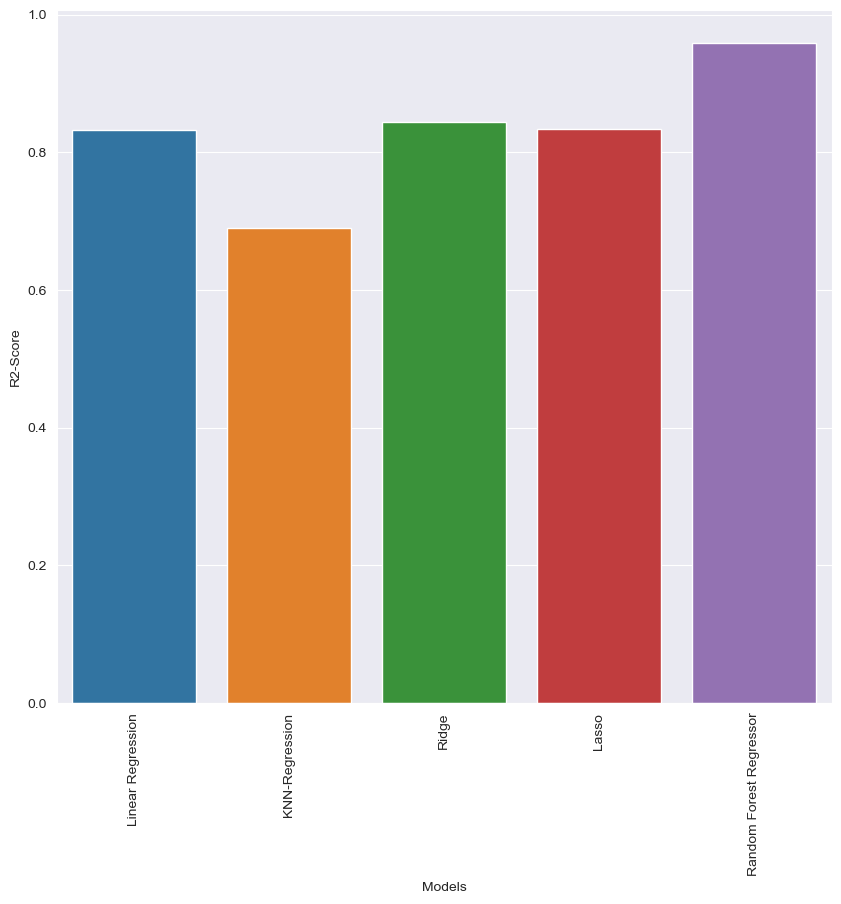

In [87]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,9))
sns.barplot(x=Model["Models"],y=Model["R2-Score"])
plt.xticks(rotation=90)
plt.show()

After comparison we can see that Random Forest Regressor is the best model as it acquire highest r2-score value as compare to others